# 설문지 만족도 별 많이 언급된 단어를 시각화

In [65]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import re

In [3]:
sur = pd.read_csv('survey_설문지.csv')
sur

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [6]:
sur['comment'] = sur['comment'].str.replace('[a-zA-Z0-9]',"")
sur

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [9]:
score1 = sur.query('satisfaction == 1')
score2 = sur.query('satisfaction == 2')
score3 = sur.query('satisfaction == 3')
score4 = sur.query('satisfaction == 4')
score5 = sur.query('satisfaction == 5')

In [58]:
from konlpy.tag import Okt
sur_keyword1 = score1['comment']
sur_keyword2 = score2['comment']
sur_keyword3 = score3['comment']
sur_keyword4 = score4['comment']
sur_keyword5 = score5['comment']

In [59]:
sur_keyword2 = sur_keyword2.dropna()

In [62]:
sur_keyword3 = sur_keyword3.dropna()

In [70]:
words1 = []

t = Okt()

for i in sur_keyword1:
    token_nouns = t.nouns(i)
    #print('token:', token_nouns)
    for temp_nouns in token_nouns:
        if len(temp_nouns) > 1:
            words1.append(temp_nouns)
        
print(words1[:])

words_cnt1 = {}
for i in words1:
    words_cnt1[i] = words_cnt1.get(i, 0) +1

print(words_cnt1)

['역앞', '젊은이', '슈퍼', '밤길', '지구', '관광', '명소', '버스', '별로', '역앞', '주차장', '아저씨', '경찰', '순찰', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차장', '수가', '요금', '공공', '주차장', '버스', '노선', '지난달', '직원', '비리', '의혹', '대해', '설명', '달라', '시청', '담당자', '마음', '관공서', '연결', '대응', '시오', '골목', '겨울철', '노면', '동결', '사고', '처리', '도둑고양이', '피해', '도둑고양이', '대책', '고속도로', '길이', '정체', '확장', '야간', '병원', '불안', '공원', '놀이기구', '역앞', '주차장']
{'역앞': 4, '젊은이': 1, '슈퍼': 1, '밤길': 1, '지구': 1, '관광': 1, '명소': 1, '버스': 2, '별로': 1, '주차장': 5, '아저씨': 1, '경찰': 1, '순찰': 1, '신호등': 1, '사거리': 1, '때문': 1, '사고': 2, '신호': 1, '상가': 1, '활성화': 1, '활동': 1, '좀더': 1, '행정': 1, '뒷받침': 1, '아이': 1, '장소': 1, '자전거': 1, '가로수': 2, '낙엽': 1, '청소': 1, '관광지': 1, '최근': 1, '지방': 1, '넘버': 1, '치안': 1, '제대로': 1, '수가': 1, '요금': 1, '공공': 1, '노선': 1, '지난달': 1, '직원': 1, '비리': 1, '의혹': 1, '대해': 1, '설명': 1, '달라': 1, '시청': 1, '담당자': 1, '마음': 1, '관공서': 1, '연결

In [71]:
words2 = []

t2 = Okt()

for i in sur_keyword2:
    token_nouns = t2.nouns(i)
    #print('token:', token_nouns)
    for temp_nouns in token_nouns:
        if len(temp_nouns) > 1:
            words2.append(temp_nouns)
        
print(words2[:])

words_cnt2 = {}
for i in words2:
    words_cnt2[i] = words_cnt2.get(i, 0) +1

print(words_cnt2)

['역앞', '상가', '장소', '축제', '성대', '공원', '영화관', '공원', '추가', '교통', '체증', '상가', '지붕', '큰일', '상가', '카페', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '재난', '피난', '장소', '재해', '비축', '상황', '지역', '자치', '단체', '지원', '보행자', '신호', '노인', '어린이', '생각', '설정', '동네', '쓰레기', '처리', '시설', '걱정', '공해', '피난', '경로', '표시', '마스코트', '고령자', '지원', '시설', '홈페이지', '설문지', '투고', '달라', '공원']
{'역앞': 1, '상가': 3, '장소': 2, '축제': 1, '성대': 1, '공원': 3, '영화관': 1, '추가': 1, '교통': 1, '체증': 1, '지붕': 1, '큰일': 1, '카페': 1, '스포츠': 1, '센터': 1, '이용': 1, '요금': 1, '워킹맘': 1, '지원': 3, '재난': 1, '피난': 2, '재해': 1, '비축': 1, '상황': 1, '지역': 1, '자치': 1, '단체': 1, '보행자': 1, '신호': 1, '노인': 1, '어린이': 1, '생각': 1, '설정': 1, '동네': 1, '쓰레기': 1, '처리': 1, '시설': 2, '걱정': 1, '공해': 1, '경로': 1, '표시': 1, '마스코트': 1, '고령자': 1, '홈페이지': 1, '설문지': 1, '투고': 1, '달라': 1}


In [72]:
words3 = []

t3 = Okt()

for i in sur_keyword3:
    token_nouns = t3.nouns(i)
    #print('token:', token_nouns)
    for temp_nouns in token_nouns:
        if len(temp_nouns) > 1:
            words3.append(temp_nouns)
        
print(words3[:])

words_cnt3 = {}
for i in words3:
    words_cnt3[i] = words_cnt3.get(i, 0) +1

print(words_cnt3)

['생활', '장소', '상업시설', '데이트', '명소', '가로수', '기업', '요즘', '범람', '피해', '크게', '도시', '범람', '방지', '취하', '설명', '관공서', '출장소', '역전', '동물원']
{'생활': 1, '장소': 1, '상업시설': 1, '데이트': 1, '명소': 1, '가로수': 1, '기업': 1, '요즘': 1, '범람': 2, '피해': 1, '크게': 1, '도시': 1, '방지': 1, '취하': 1, '설명': 1, '관공서': 1, '출장소': 1, '역전': 1, '동물원': 1}


In [73]:
words4 = []

t4 = Okt()

for i in sur_keyword4:
    token_nouns = t4.nouns(i)
    #print('token:', token_nouns)
    for temp_nouns in token_nouns:
        if len(temp_nouns) > 1:
            words4.append(temp_nouns)
        
print(words4[:])

words_cnt4 = {}
for i in words4:
    words_cnt4[i] = words_cnt4.get(i, 0) +1

print(words_cnt4)

['어린이집', '바로', '입원', '대기', '아동', '병원', '초등학교', '근처', '공원', '살기', '육아', '상가', '쓰레기', '처리', '육아', '최고', '길이', '집세', '합리', '스포츠', '센터', '자주', '이용', '자전거', '달리기', '소방', '활동', '보도', '길이', '급행', '시내', '시장', '활기', '자연', '경관']
{'어린이집': 1, '바로': 1, '입원': 1, '대기': 1, '아동': 1, '병원': 1, '초등학교': 1, '근처': 1, '공원': 1, '살기': 1, '육아': 2, '상가': 1, '쓰레기': 1, '처리': 1, '최고': 1, '길이': 2, '집세': 1, '합리': 1, '스포츠': 1, '센터': 1, '자주': 1, '이용': 1, '자전거': 1, '달리기': 1, '소방': 1, '활동': 1, '보도': 1, '급행': 1, '시내': 1, '시장': 1, '활기': 1, '자연': 1, '경관': 1}


In [74]:
words5 = []

t5 = Okt()

for i in sur_keyword5:
    token_nouns = t5.nouns(i)
    #print('token:', token_nouns)
    for temp_nouns in token_nouns:
        if len(temp_nouns) > 1:
            words5.append(temp_nouns)
        
print(words5[:])

words_cnt5 = {}
for i in words5:
    words_cnt5[i] = words_cnt5.get(i, 0) +1

print(words_cnt5)

['운동', '장소', '육아', '지원이', '사이클링', '코스', '시내', '접근성', '달리기', '운동', '장소', '자치', '단체', '활동', '안심', '벚꽃', '길이', '최고', '벚꽃', '앙케이트', '제대로', '확인', '거리', '조성', '반영', '자세', '관공서', '토요일', '일요일', '홈페이지', '관공서', '상담', '매우', '대해', '초등학교', '운동장', '잔디밭', '아주']
{'운동': 2, '장소': 2, '육아': 1, '지원이': 1, '사이클링': 1, '코스': 1, '시내': 1, '접근성': 1, '달리기': 1, '자치': 1, '단체': 1, '활동': 1, '안심': 1, '벚꽃': 2, '길이': 1, '최고': 1, '앙케이트': 1, '제대로': 1, '확인': 1, '거리': 1, '조성': 1, '반영': 1, '자세': 1, '관공서': 2, '토요일': 1, '일요일': 1, '홈페이지': 1, '상담': 1, '매우': 1, '대해': 1, '초등학교': 1, '운동장': 1, '잔디밭': 1, '아주': 1}


In [64]:
pip install wordcloud


     -------------------------------------- 153.3/153.3 kB 4.6 MB/s eta 0:00:00


In [66]:
font_path  =  "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# 

# 결과

## 1) 만족도 1에 대한 코멘트 단어

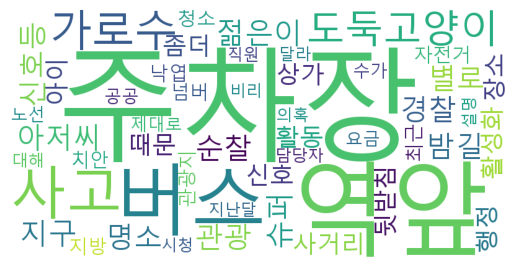

In [75]:
wordcloud = WordCloud(background_color = "white", font_path = font_path,
                     width = 800, height = 400, max_words = 50)
plt.imshow(wordcloud.generate_from_frequencies(words_cnt1))
plt.axis("off")
plt.show()

## 2) 만족도 2에 대한 코멘트 단어

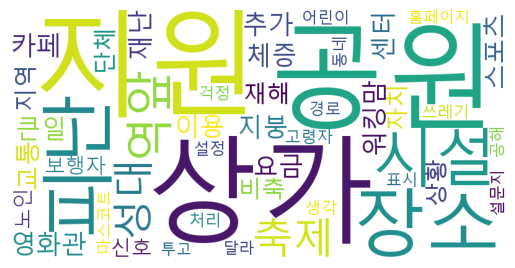

In [80]:
plt.imshow(wordcloud.generate_from_frequencies(words_cnt2))
plt.axis("off")
plt.show()

## 3) 만족도 3에 대한 코멘트 단어

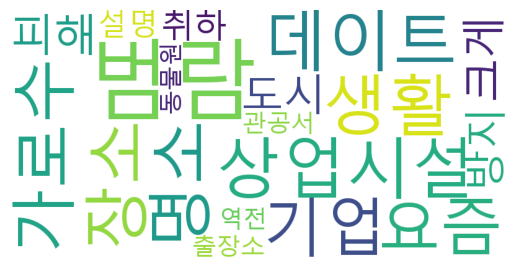

In [77]:
plt.imshow(wordcloud.generate_from_frequencies(words_cnt3))
plt.axis("off")
plt.show()

## 4) 만족도 4에 대한 코멘트 단어

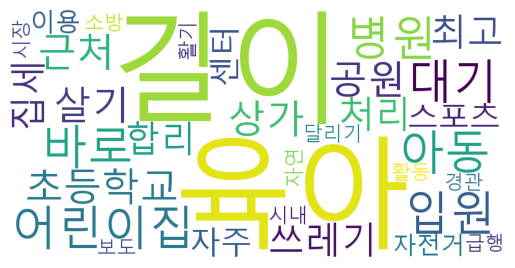

In [78]:
plt.imshow(wordcloud.generate_from_frequencies(words_cnt4))
plt.axis("off")
plt.show()

## 5) 만족도 5에 대한 코멘트 단어

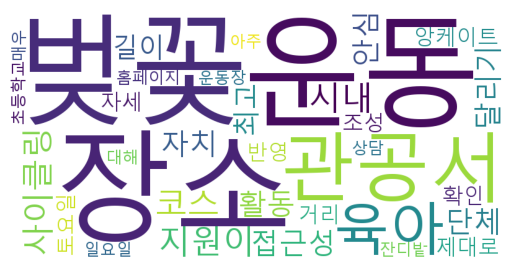

In [79]:
plt.imshow(wordcloud.generate_from_frequencies(words_cnt5))
plt.axis("off")
plt.show()